# COVID-19 Time Series Prediction


### Dependencies importing

In [1]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2
### TBE -> To Be Engineering...
# covid_ts_pred package
from covid_ts_pred.c_eng.engineering import *

project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/.env
project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/covid_ts_pred/.env


In [42]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.pylab as plab

import geopandas as gpd

from covid_ts_pred.a_data.country_data import country_output
from data_files.out_csv import world_population

LISTA DE PAISES

In [43]:
country = 'United Kingdom'

country_index = pd.read_csv(get_raw_data_path('index', f"data_{country}.csv"), index_col=False)

country_index.drop(columns = 'Unnamed: 0', inplace=True)

country_index['date'] = pd.to_datetime(country_index['date'])

country_index['new_deaths'] = country_index['new_deaths'].rolling(window=7).mean().fillna(0)
country_index['new_cases'] = country_index['new_cases'].rolling(window=7).mean().fillna(0)

# POPULATION COUNTRY
population = pd.read_csv(get_py_path('data_files', 'out_csv', 'world_population', 'world_population.csv'))
population = population[['Country Name', '2021']]
countries_population = population.loc[population['Country Name'] == country].iloc[0].drop(columns = 'Country Name')[1]/10000

country_index['total_cases_pop'] = country_index['total_cases'].apply(lambda x: x/countries_population)
country_index['new_cases_pop'] = country_index['new_cases'].apply(lambda x: x/countries_population)
country_index['total_deaths_pop'] = country_index['total_deaths'].apply(lambda x: x/countries_population)
country_index['new_deaths_pop'] = country_index['new_deaths'].apply(lambda x: x/countries_population)    


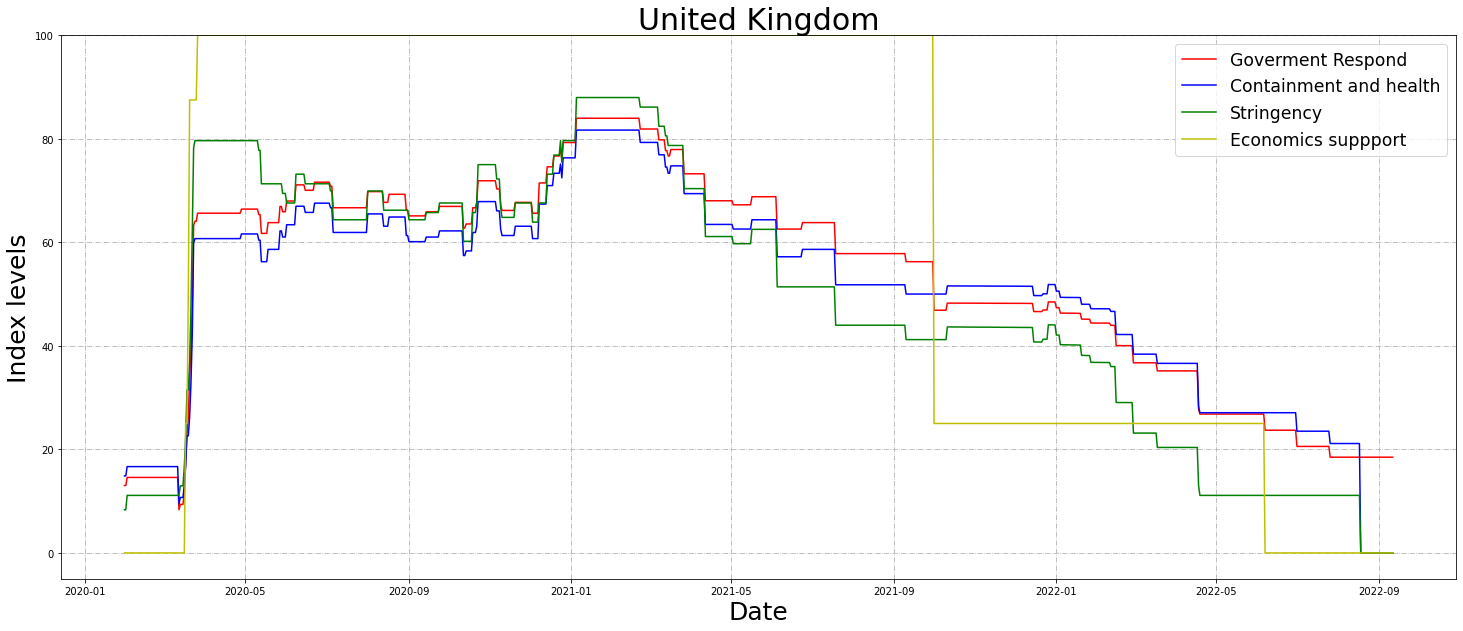

In [44]:
# Visualization Indexs
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['gov_response']], color = 'r')
plt.plot(x, country_index[['containment_and_health']], color = 'b')
plt.plot(x, country_index[['stringency']], color = 'g')
plt.plot(x, country_index[['economics_sup']], color = 'y')
plt.xlabel('Date', fontsize=25)
plt.ylim([-5, 100])
plt.ylabel('Index levels', color='black', fontsize=25)
plt.title(country, fontsize=30)
plt.grid(visible=True, linestyle='-.')
plt.legend(['Goverment Respond','Containment and health','Stringency','Economics suppport'], fontsize='xx-large');

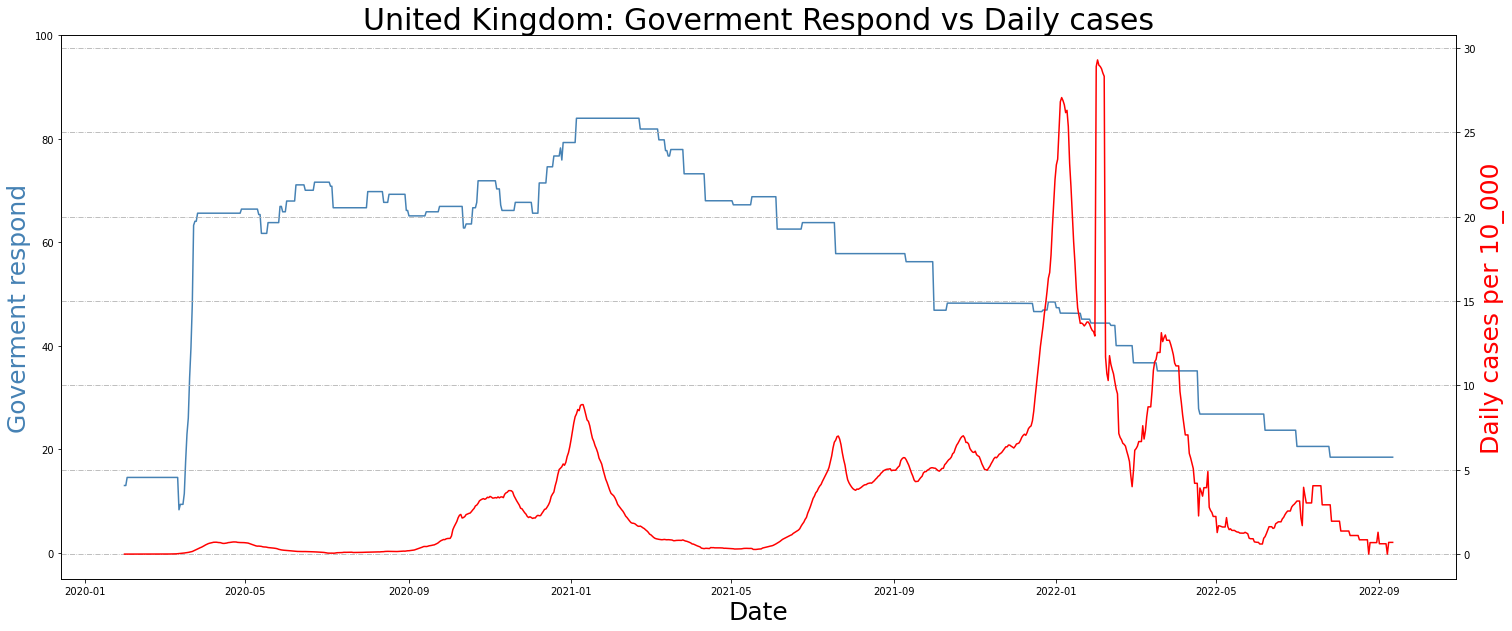

In [45]:
#Goverment responde vs New cases
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots(figsize=(25,10))

#add first line to plot
ax.plot(country_index.date, country_index.gov_response, color=col1)

#add x-axis label
ax.set_xlabel('Date', fontsize=25)
ax.set_ylim([-5, 100])

#add y-axis label
ax.set_ylabel('Goverment respond', color=col1, fontsize=25)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(country_index.date, country_index.new_cases_pop, color=col2)
#plt.yscale('log')

#add second y-axis label
ax2.set_ylabel('Daily cases per 10_000', color=col2, fontsize=25);

plt.title(f'{country}: Goverment Respond vs Daily cases', fontsize=30);
plt.grid(visible=True, linestyle='-.');

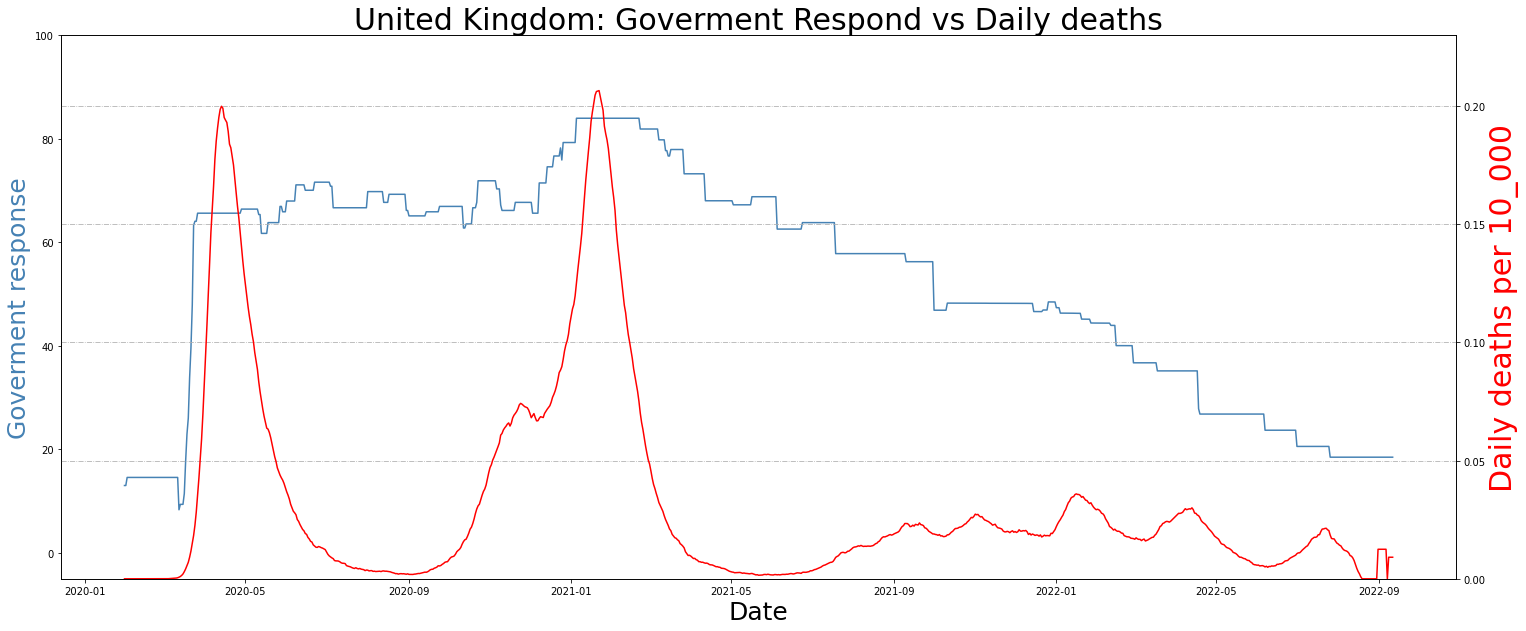

In [46]:
### Goverment responde vs New deaths
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots(figsize=(25,10))
#plt.fig(figsize=(25,10))

#add first line to plot
ax.plot(country_index.date, country_index.gov_response, color=col1)

#add x-axis label
ax.set_xlabel('Date', fontsize=25)

#add y-axis label
ax.set_ylabel('Goverment response', color=col1, fontsize=25)
ax.set_ylim([-5, 100])

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(country_index.date, country_index.new_deaths_pop, color=col2)

#plt.yscale('log')

#add second y-axis label
ax2.set_ylabel('Daily deaths per 10_000', color=col2, fontsize=30);
ax2.set_ylim([0, 0.23])
plt.grid(visible=True, linestyle='-.')
plt.title(f'{country}: Goverment Respond vs Daily deaths', fontsize=30);

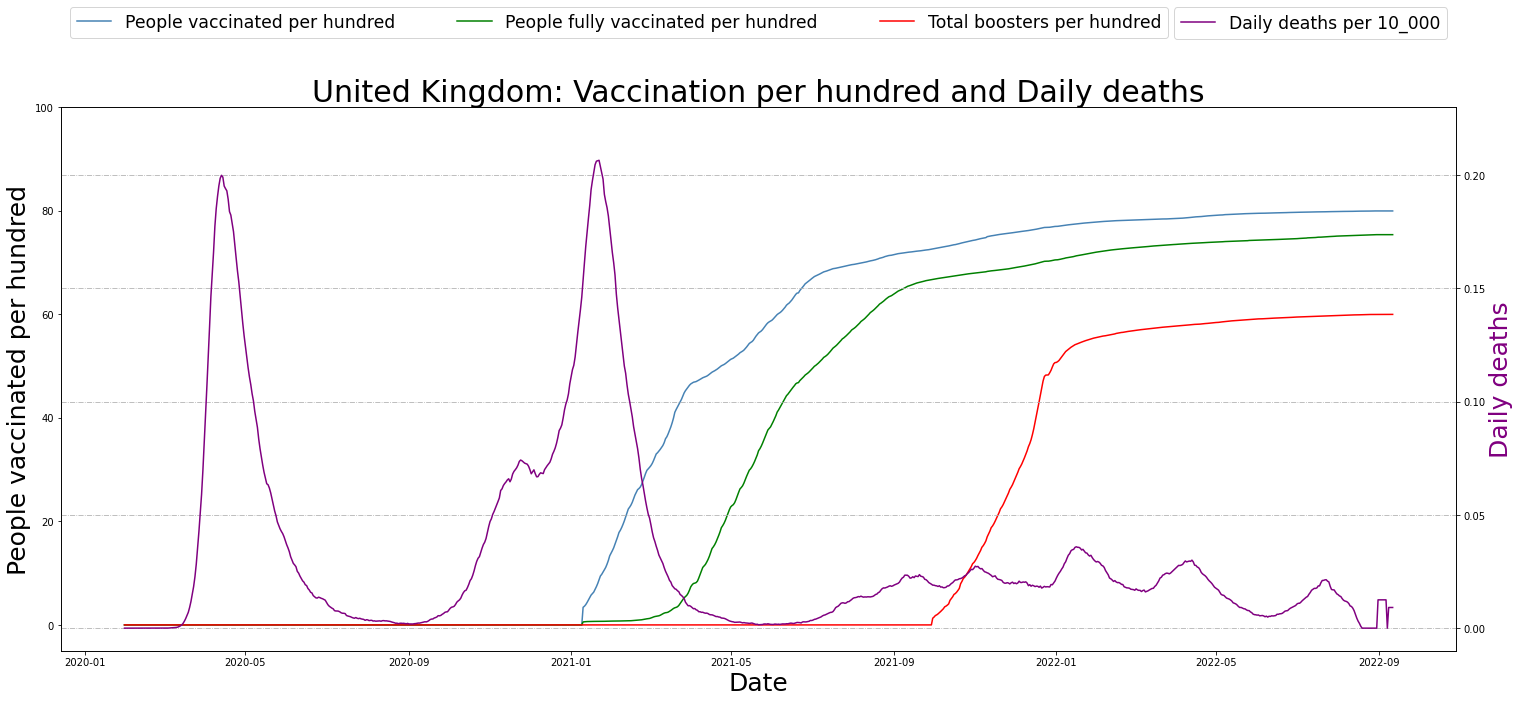

In [47]:
### Vacinnation per hundred vs New deaths    
#define colors to use
col1 = 'steelblue'
col2 = 'green'
col3 = 'red'
col4 = 'purple'

#define subplots
fig,ax = plt.subplots(figsize=(25,10))

#add first line to plot
ax.plot(country_index.date, country_index.people_vaccinated_per_hundred, color=col1)
ax.plot(country_index.date, country_index.people_fully_vaccinated_per_hundred, color=col2)
ax.plot(country_index.date, country_index.total_boosters_per_hundred, color=col3)

#add x-axis label
ax.set_xlabel('Date', fontsize=25)
ax.set_ylim([-5, 100])

#add y-axis label
ax.set_ylabel('People vaccinated per hundred', color='black', fontsize=25)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(country_index.date, country_index.new_deaths_pop, color=col4)

#add second y-axis label
ax2.set_ylabel('Daily deaths', color=col4, fontsize=25)
#plt.yscale('log')
ax2.set_ylim([-0.01, 0.23])

ax.legend(['People vaccinated per hundred','People fully vaccinated per hundred','Total boosters per hundred'],
          fontsize='xx-large', loc='best', bbox_to_anchor =(0, 1.2, 0.8, 0.001),ncol=3, mode="expand");
ax2.legend(['Daily deaths per 10_000'],
          fontsize='xx-large', bbox_to_anchor =(1, 1.2));
plt.grid(visible=True, linestyle='-.')
plt.title(f'{country}: Vaccination per hundred and Daily deaths', fontsize=30);

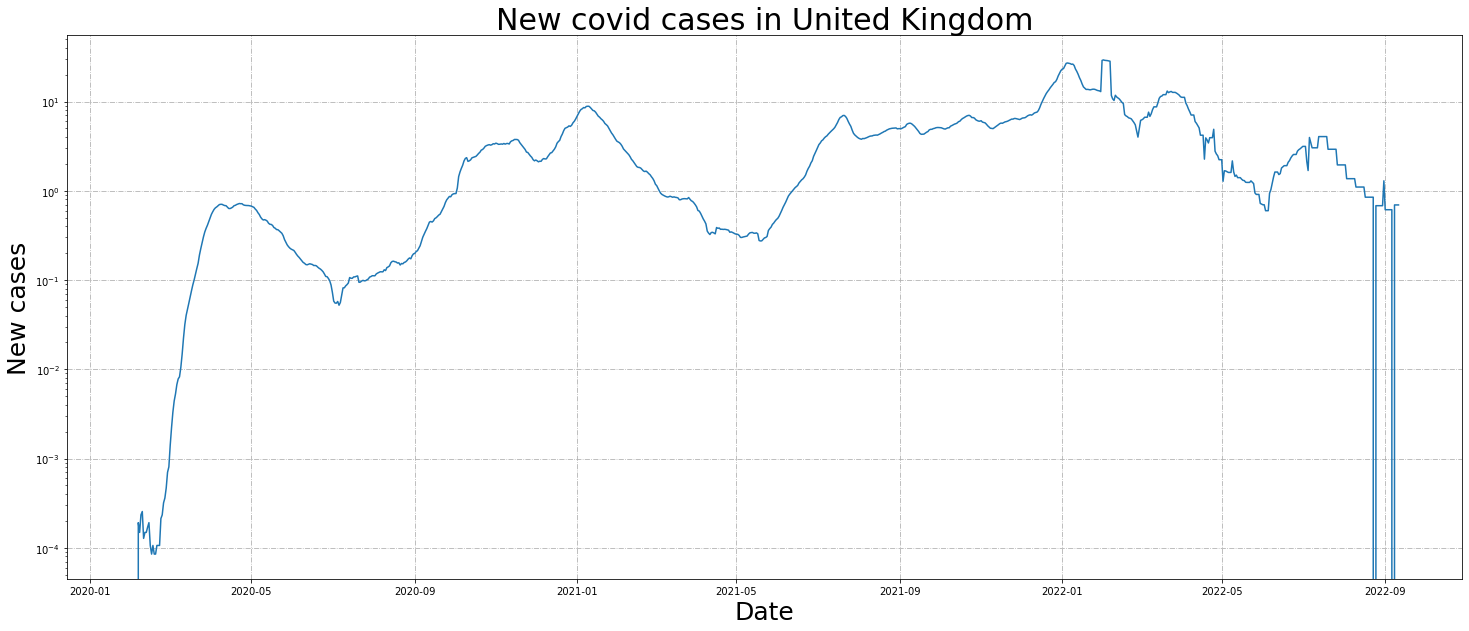

In [48]:
# Visualization new cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['new_cases_pop']]);
plt.xlabel('Date', fontsize=25)
plt.ylabel('New cases', color='black', fontsize=25)
plt.yscale('log')
plt.grid(visible=True, linestyle='-.')
plt.title(f'New covid cases in {country}', fontsize=30);


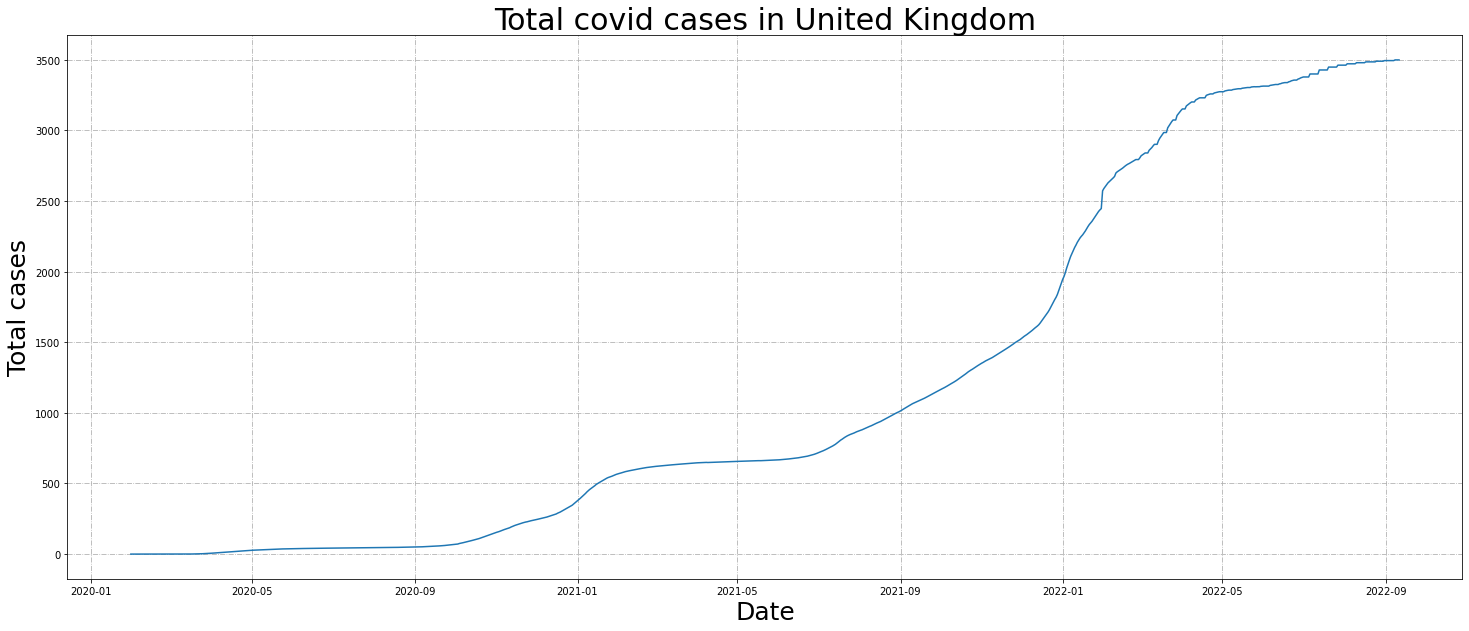

In [49]:
# Visualization total cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['total_cases_pop']]);
plt.xlabel('Date', fontsize=25)
plt.ylabel('Total cases', color='black', fontsize=25)
plt.grid(visible=True, linestyle='-.')
plt.title(f'Total covid cases in {country}', fontsize=30);

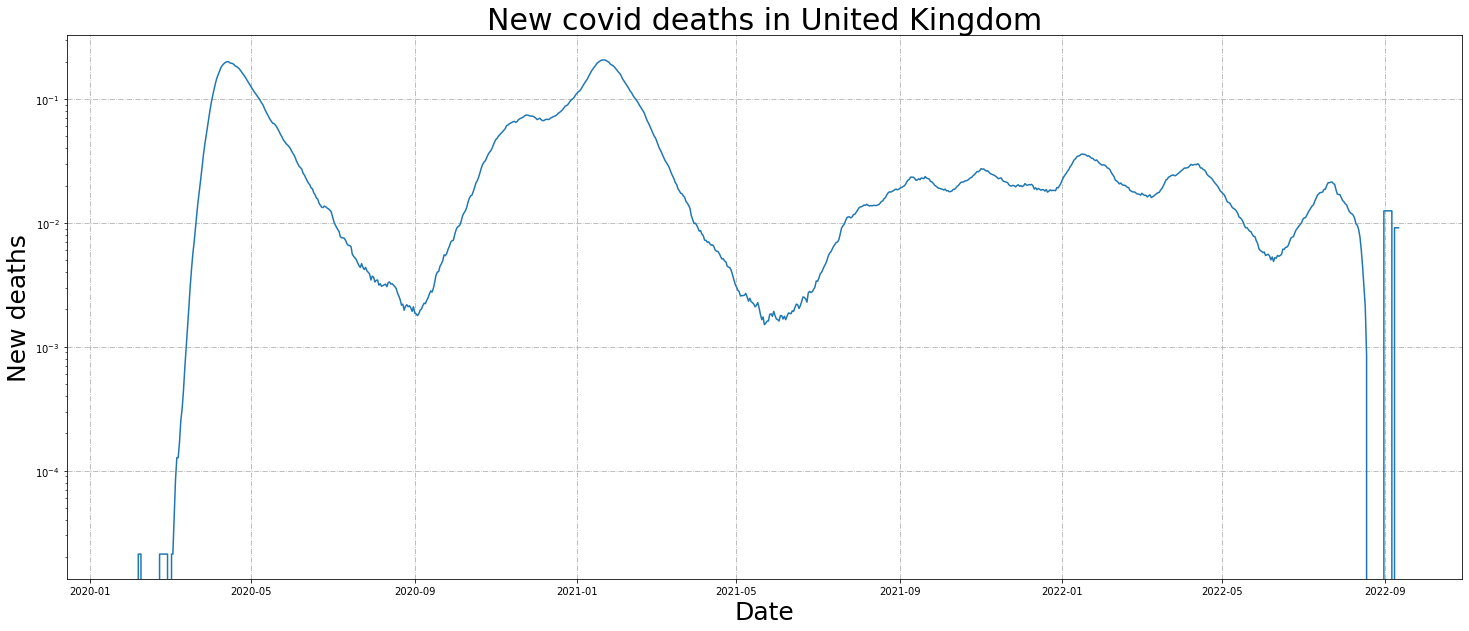

In [50]:
# Visualization new deaths
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['new_deaths_pop']]);
plt.xlabel('Date', fontsize=25)
plt.ylabel('New deaths', color='black', fontsize=25)
plt.yscale('log')
plt.grid(visible=True, linestyle='-.')
plt.title(f'New covid deaths in {country}', fontsize=30);

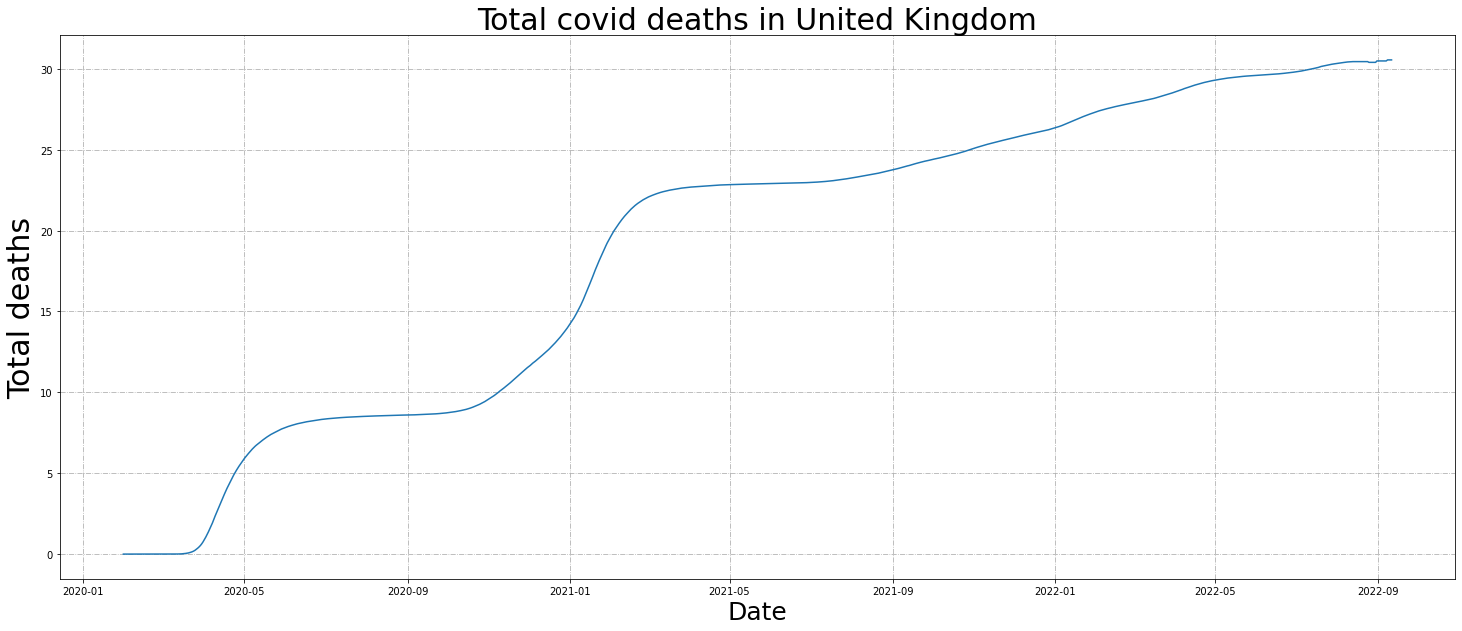

In [51]:
# Visualization total deaths
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['total_deaths_pop']]);
plt.xlabel('Date', fontsize=25)
plt.ylabel('Total deaths', color='black', fontsize=30)
plt.grid(visible=True, linestyle='-.')
plt.title(f'Total covid deaths in {country}', fontsize=30);

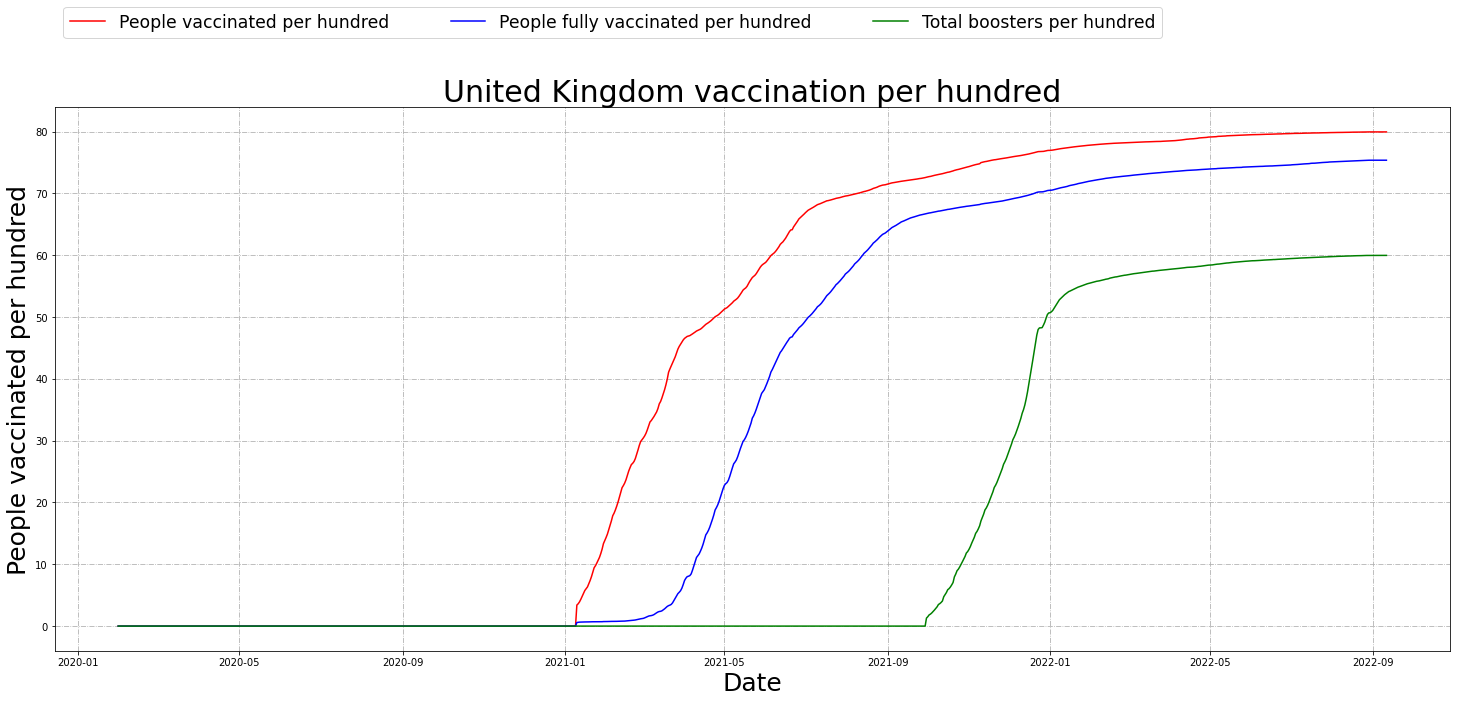

In [52]:
# Visualization Vaccination 
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['people_vaccinated_per_hundred']], color = 'r')
plt.plot(x, country_index[['people_fully_vaccinated_per_hundred']], color = 'b')
plt.plot(x, country_index[['total_boosters_per_hundred']], color = 'g')
plt.xlabel('Date', fontsize=25)
plt.ylabel('People vaccinated per hundred', color='black', fontsize=25)
plt.title(f'{country} vaccination per hundred', fontsize=30)
plt.legend(['People vaccinated per hundred','People fully vaccinated per hundred','Total boosters per hundred'],
          fontsize='xx-large', loc='best', bbox_to_anchor =(0, 1.2, 0.8, 0.001),ncol=3, mode="expand");
plt.grid(visible=True, linestyle='-.');

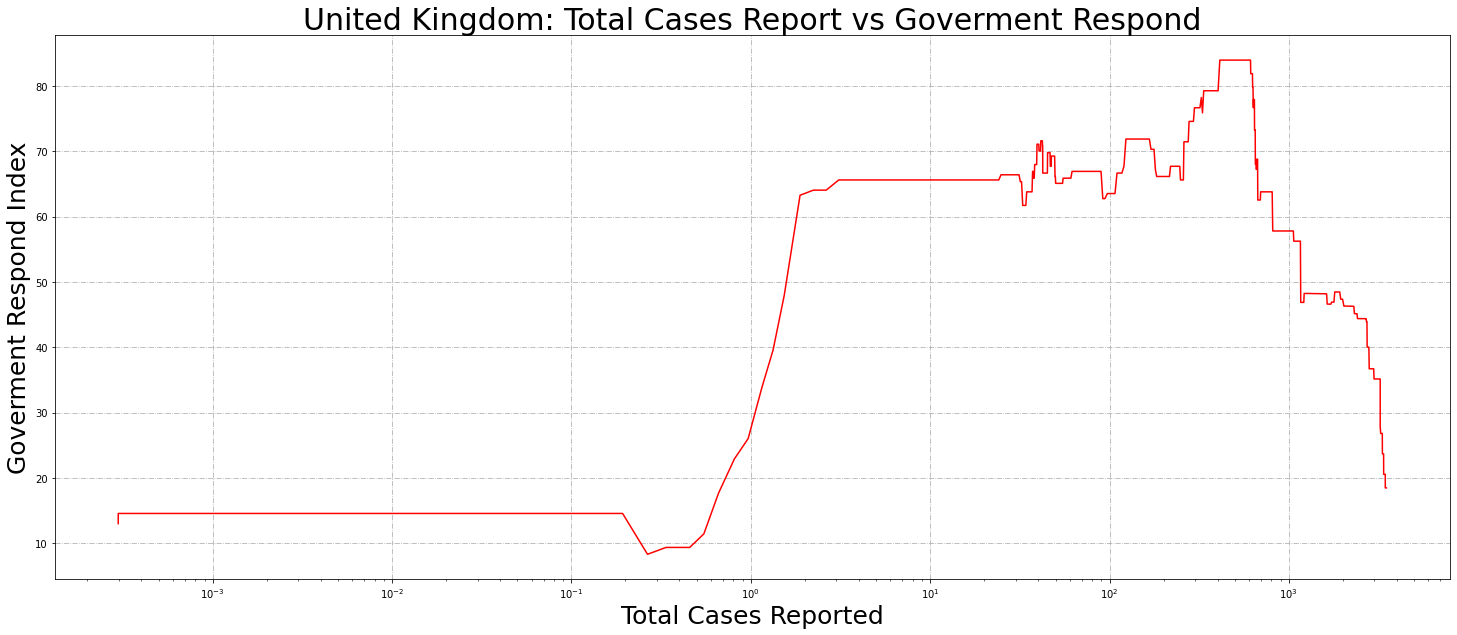

In [53]:
x = country_index[['total_cases_pop']]
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['gov_response']], color = 'r')
plt.xscale('log')
plt.xlabel('Total Cases Reported', fontsize=25)
plt.ylabel('Goverment Respond Index', color='black', fontsize=25);
plt.grid(visible=True, linestyle='-.')
plt.title(f'{country}: Total Cases Report vs Goverment Respond', fontsize=30);

In [54]:
list_countries = ['Brazil', 'France', 'India', 'United Kingdom', 'Mexico']
countries_index = {}

for country in list_countries:

    country_index = pd.read_csv(get_raw_data_path('index', f"data_{country}.csv"), index_col=False)

    country_index.drop(columns = 'Unnamed: 0', inplace=True)

    country_index['date']=pd.to_datetime(country_index['date'])

    country_index['new_deaths'] = country_index['new_deaths'].rolling(window=7).mean().fillna(0)
    country_index['new_cases'] = country_index['new_cases'].rolling(window=7).mean().fillna(0)

    # POPULATION COUNTRY
    population = pd.read_csv(get_py_path('data_files', 'out_csv', 'world_population', 'world_population.csv'))

    population = population[['Country Name', '2021']]
    population = pd.read_csv(get_py_path('data_files', 'out_csv', 'world_population', 'world_population.csv'))

    country_index['total_cases_pop'] = country_index['total_cases'].apply(lambda x: x/countries_population)
    country_index['new_cases_pop'] = country_index['new_cases'].apply(lambda x: x/countries_population)
    country_index['total_deaths_pop'] = country_index['total_deaths'].apply(lambda x: x/countries_population)
    country_index['new_deaths_pop'] = country_index['new_deaths'].apply(lambda x: x/countries_population) 
    
    countries_index[country] = country_index


In [55]:
list_countries = ['Brazil', 'France', 'India', 'United Kingdom', 'Mexico']

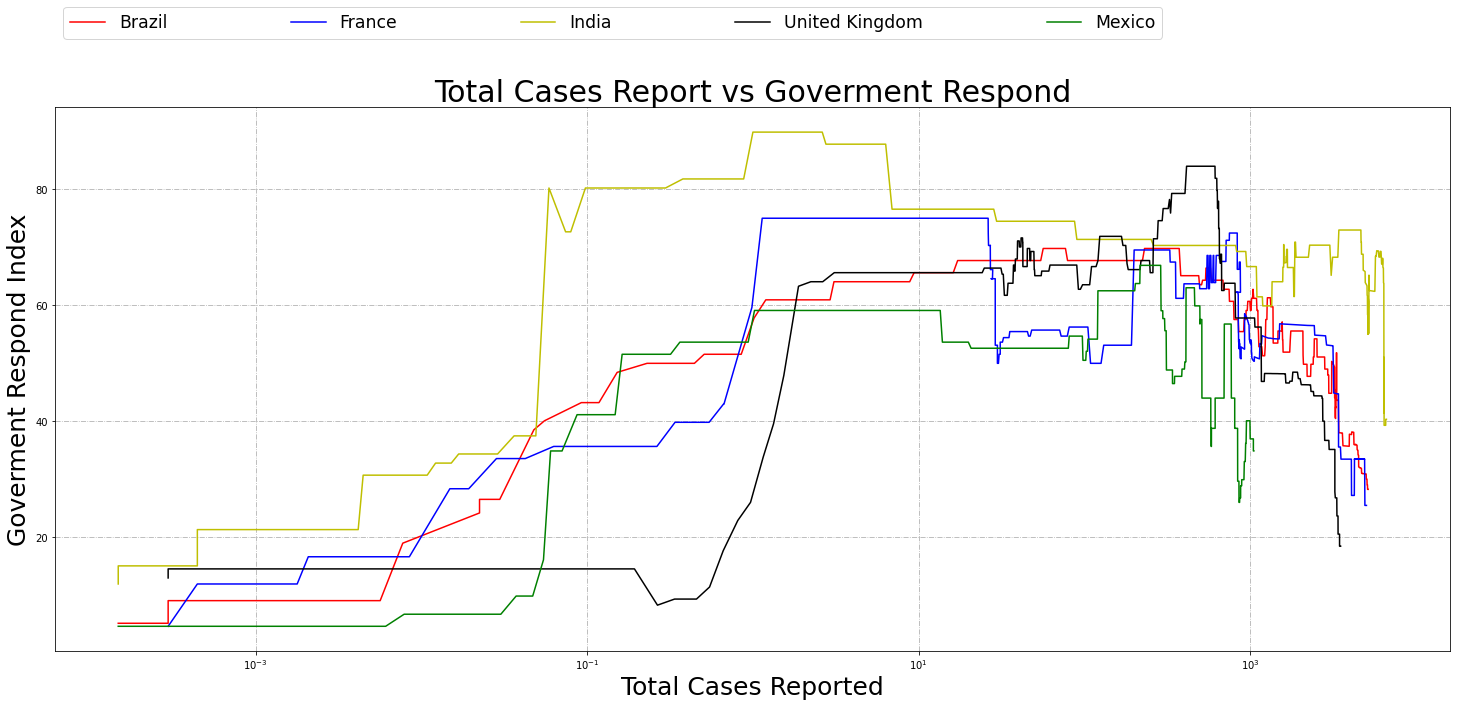

In [56]:
x1 = countries_index['Brazil']['total_cases_pop']
y1 = countries_index['Brazil']['gov_response']

x2 = countries_index['France']['total_cases_pop']
y2 = countries_index['France']['gov_response']

x3 = countries_index['India']['total_cases_pop']
y3 = countries_index['India']['gov_response']

x4 = countries_index['United Kingdom']['total_cases_pop']
y4 = countries_index['United Kingdom']['gov_response']

x5 = countries_index['Mexico']['total_cases_pop']
y5 = countries_index['Mexico']['gov_response']

img = plt.figure(figsize=(25,10))
plt.plot(x1, y1, color = 'r', label = 'Brazil')
plt.plot(x2, y2, color = 'b', label = 'France')
plt.plot(x3, y3, color = 'y', label = 'India')
plt.plot(x4, y4, color = 'black', label = 'United Kingdom')
plt.plot(x5, y5, color = 'g', label = 'Mexico')

plt.xscale('log')
plt.xlabel('Total Cases Reported', fontsize=25)
plt.ylabel('Goverment Respond Index', color='black', fontsize=25);
plt.grid(visible=True, linestyle='-.')
plt.legend(['Brazil','France','India', 'United Kingdom', 'Mexico'],
          fontsize='xx-large', loc='best', bbox_to_anchor =(0, 1.2, 0.8, 0.001),ncol=5, mode="expand");

plt.title(f'Total Cases Report vs Goverment Respond', fontsize=30);


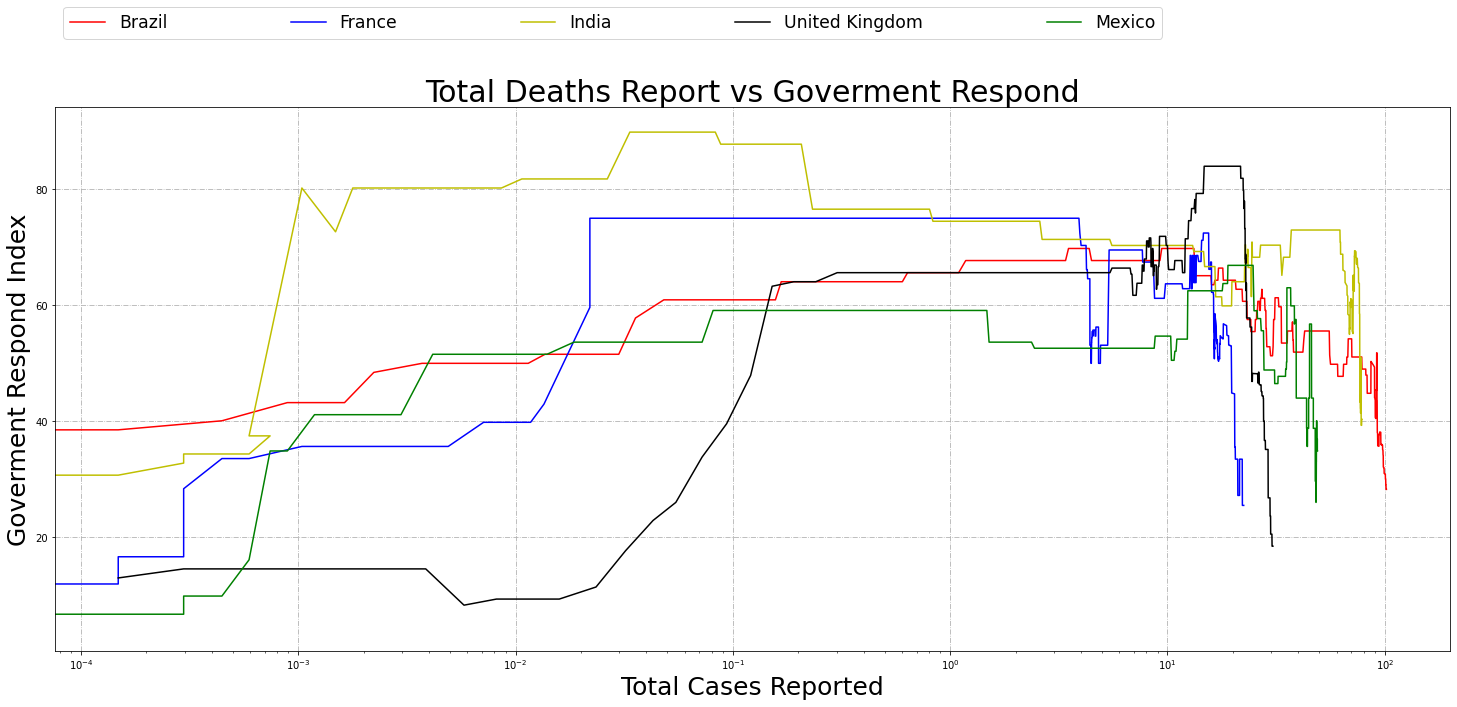

In [57]:
x1 = countries_index['Brazil']['total_deaths_pop']
y1 = countries_index['Brazil']['gov_response']

x2 = countries_index['France']['total_deaths_pop']
y2 = countries_index['France']['gov_response']

x3 = countries_index['India']['total_deaths_pop']
y3 = countries_index['India']['gov_response']

x4 = countries_index['United Kingdom']['total_deaths_pop']
y4 = countries_index['United Kingdom']['gov_response']

x5 = countries_index['Mexico']['total_deaths_pop']
y5 = countries_index['Mexico']['gov_response']

img = plt.figure(figsize=(25,10))
plt.plot(x1, y1, color = 'r', label = 'Brazil')
plt.plot(x2, y2, color = 'b', label = 'France')
plt.plot(x3, y3, color = 'y', label = 'India')
plt.plot(x4, y4, color = 'black', label = 'United Kingdom')
plt.plot(x5, y5, color = 'g', label = 'Mexico')

plt.xscale('log')
plt.xlabel('Total Cases Reported', fontsize=25)
plt.ylabel('Goverment Respond Index', color='black', fontsize=25);
plt.grid(visible=True, linestyle='-.')
plt.legend(['Brazil','France','India', 'United Kingdom', 'Mexico'],
          fontsize='xx-large', loc='best', bbox_to_anchor =(0, 1.2, 0.8, 0.001),ncol=5, mode="expand");

plt.title(f'Total Deaths Report vs Goverment Respond', fontsize=30);


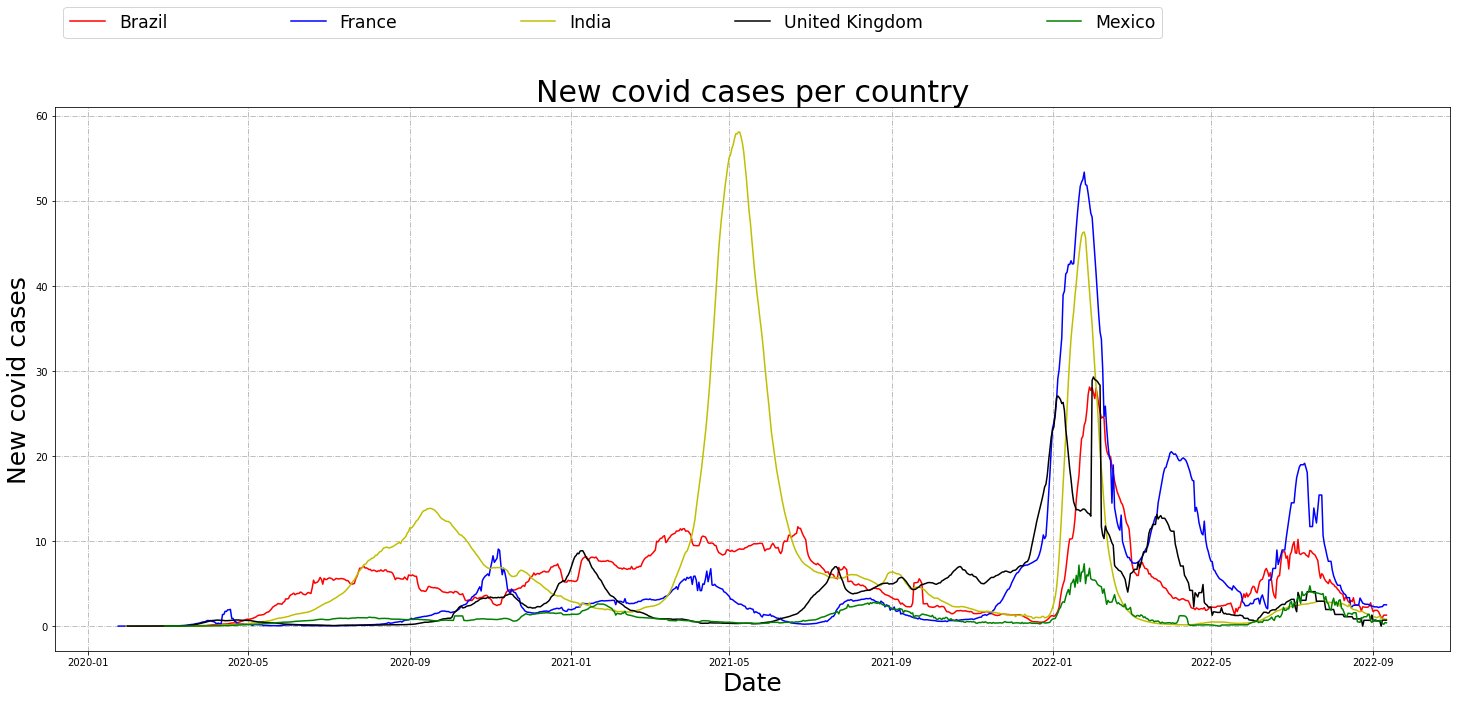

In [58]:
x1 = countries_index['Brazil']['date']
y1 = countries_index['Brazil']['new_cases_pop']

x2 = countries_index['France']['date']
y2 = countries_index['France']['new_cases_pop']

x3 = countries_index['India']['date']
y3 = countries_index['India']['new_cases_pop']

x4 = countries_index['United Kingdom']['date']
y4 = countries_index['United Kingdom']['new_cases_pop']

x5 = countries_index['Mexico']['date']
y5 = countries_index['Mexico']['new_cases_pop']

img = plt.figure(figsize=(25,10))
plt.plot(x1, y1, color = 'r', label = 'Brazil')
plt.plot(x2, y2, color = 'b', label = 'France')
plt.plot(x3, y3, color = 'y', label = 'India')
plt.plot(x4, y4, color = 'black', label = 'United Kingdom')
plt.plot(x5, y5, color = 'g', label = 'Mexico')

plt.xlabel('Date', fontsize=25)
plt.ylabel('New covid cases', color='black', fontsize=25);
plt.grid(visible=True, linestyle='-.')
plt.legend(['Brazil','France','India', 'United Kingdom', 'Mexico'],
          fontsize='xx-large', loc='best', bbox_to_anchor =(0, 1.2, 0.8, 0.001),ncol=5, mode="expand");

plt.title(f'New covid cases per country', fontsize=30);

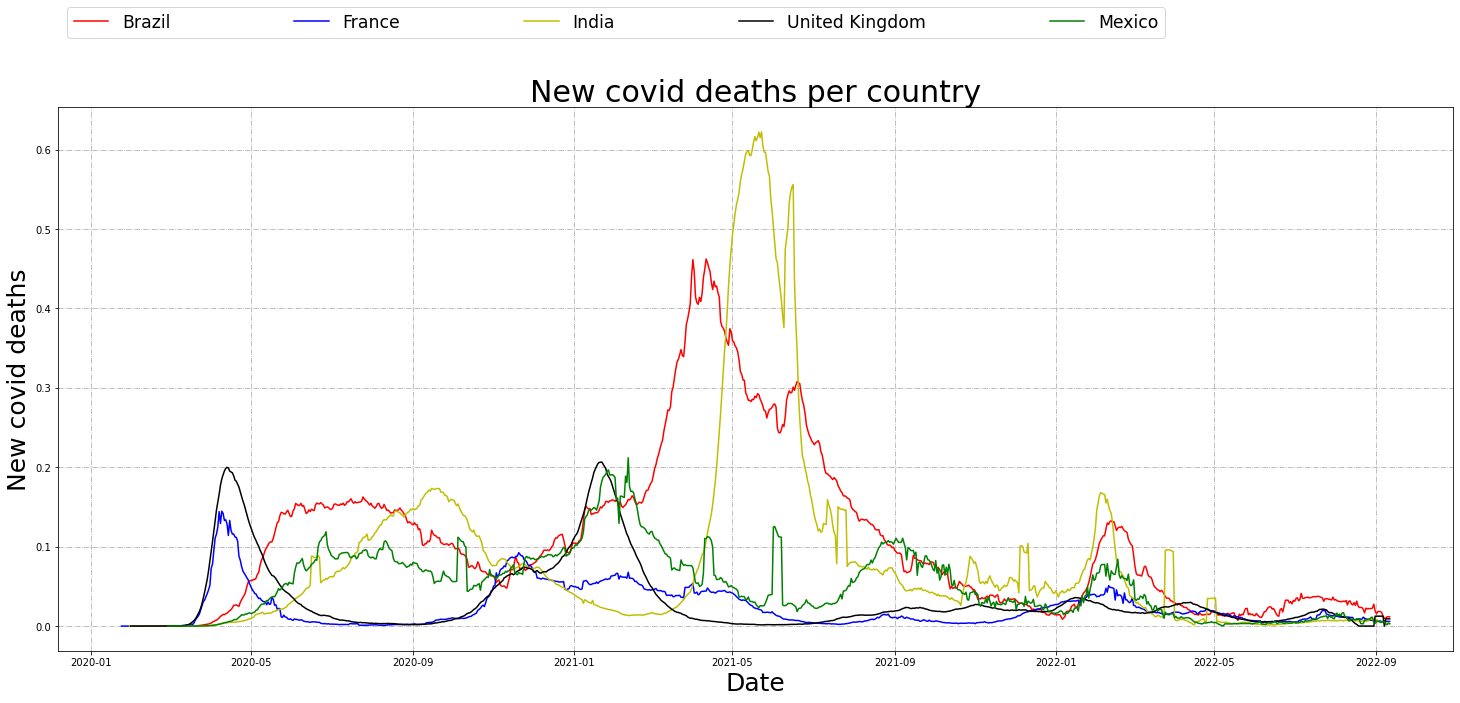

In [59]:
x1 = countries_index['Brazil']['date']
y1 = countries_index['Brazil']['new_deaths_pop']

x2 = countries_index['France']['date']
y2 = countries_index['France']['new_deaths_pop']

x3 = countries_index['India']['date']
y3 = countries_index['India']['new_deaths_pop']

x4 = countries_index['United Kingdom']['date']
y4 = countries_index['United Kingdom']['new_deaths_pop']

x5 = countries_index['Mexico']['date']
y5 = countries_index['Mexico']['new_deaths_pop']

img = plt.figure(figsize=(25,10))
plt.plot(x1, y1, color = 'r', label = 'Brazil')
plt.plot(x2, y2, color = 'b', label = 'France')
plt.plot(x3, y3, color = 'y', label = 'India')
plt.plot(x4, y4, color = 'black', label = 'United Kingdom')
plt.plot(x5, y5, color = 'g', label = 'Mexico')

plt.xlabel('Date', fontsize=25)
plt.ylabel('New covid deaths', color='black', fontsize=25);
plt.grid(visible=True, linestyle='-.')
plt.legend(['Brazil','France','India', 'United Kingdom', 'Mexico'],
          fontsize='xx-large', loc='best', bbox_to_anchor =(0, 1.2, 0.8, 0.001),ncol=5, mode="expand");

plt.title(f'New covid deaths per country', fontsize=30);

In [60]:
url_cases = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/confirmed_cases.csv'
url_deaths = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/confirmed_deaths.csv'
df_cases_raw = pd.read_csv(url_cases)
df_deaths_raw = pd.read_csv(url_deaths)

In [61]:
list_contries = ['Brazil', 'France', 'India', 'United Kingdom', 'Mexico']
list_deaths = []
list_cases = []
list_countries_population = []

for country in list_contries:

    drop_columns = ['Unnamed: 0','country_code','region_code','region_name','jurisdiction']
    countries_population = population.loc[population['Country Name'] == country].iloc[0].drop(columns = 'Country Name')[1]/10000
    
    pais_deaths = df_deaths_raw.loc[df_deaths_raw['country_name'] == country]\
                    .iloc[0].drop(drop_columns).fillna(0)[1:,]/countries_population
    pais_cases = df_cases_raw.loc[df_cases_raw['country_name'] == country]\
                    .iloc[0].drop(drop_columns).fillna(0)[1:,]/countries_population
    
    list_deaths.append(pais_deaths)
    list_cases.append(pais_cases)
    list_countries_population.append(countries_population)

list_deaths = pd.DataFrame(list_deaths)
list_deaths = list_deaths.T

list_cases = pd.DataFrame(list_cases)
list_cases = list_cases.T

list_countries_population

dates = [x for x in list_deaths.index[1:]]
dates = pd.to_datetime(dates)

# Visualization Indexs
x = dates[:-5]
img = plt.figure(figsize=(25,10))
plt.plot(x, list_deaths.iloc[1:-5,0], color = 'r', label = list_contries[0])
plt.plot(x, list_deaths.iloc[1:-5,1], color = 'b', label = list_contries[1])
plt.plot(x, list_deaths.iloc[1:-5,2], color = 'g', label = list_contries[2])
plt.plot(x, list_deaths.iloc[1:-5,3], color = 'y', label = list_contries[3])
plt.plot(x, list_deaths.iloc[1:-5,4], color = 'black', label = list_contries[4])
plt.title('Countries Total Deaths per 10_000 people', fontsize=30)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Total Deaths per 10_000 people', color='black', fontsize=25);
plt.grid(visible=True, linestyle='-.')
plt.legend(list_contries, fontsize='xx-large');

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [62]:
# Visualization Indexs
x = dates[:-5]
img = plt.figure(figsize=(25,10))
plt.plot(x, list_cases.iloc[1:-5,0], color = 'r', label = list_contries[0])
plt.plot(x, list_cases.iloc[1:-5,1], color = 'b', label = list_contries[1])
plt.plot(x, list_cases.iloc[1:-5,2], color = 'g', label = list_contries[2])
plt.plot(x, list_cases.iloc[1:-5,3], color = 'y', label = list_contries[3])
plt.plot(x, list_cases.iloc[1:-5,4], color = 'black', label = list_contries[4])
plt.title('Countries Total Cases per 10_000 people', fontsize=30)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Total Cases per 10_000 people', color='black', fontsize=25);
plt.grid(visible=True, linestyle='-.')
plt.legend(list_contries, fontsize='xx-large');

NameError: name 'dates' is not defined

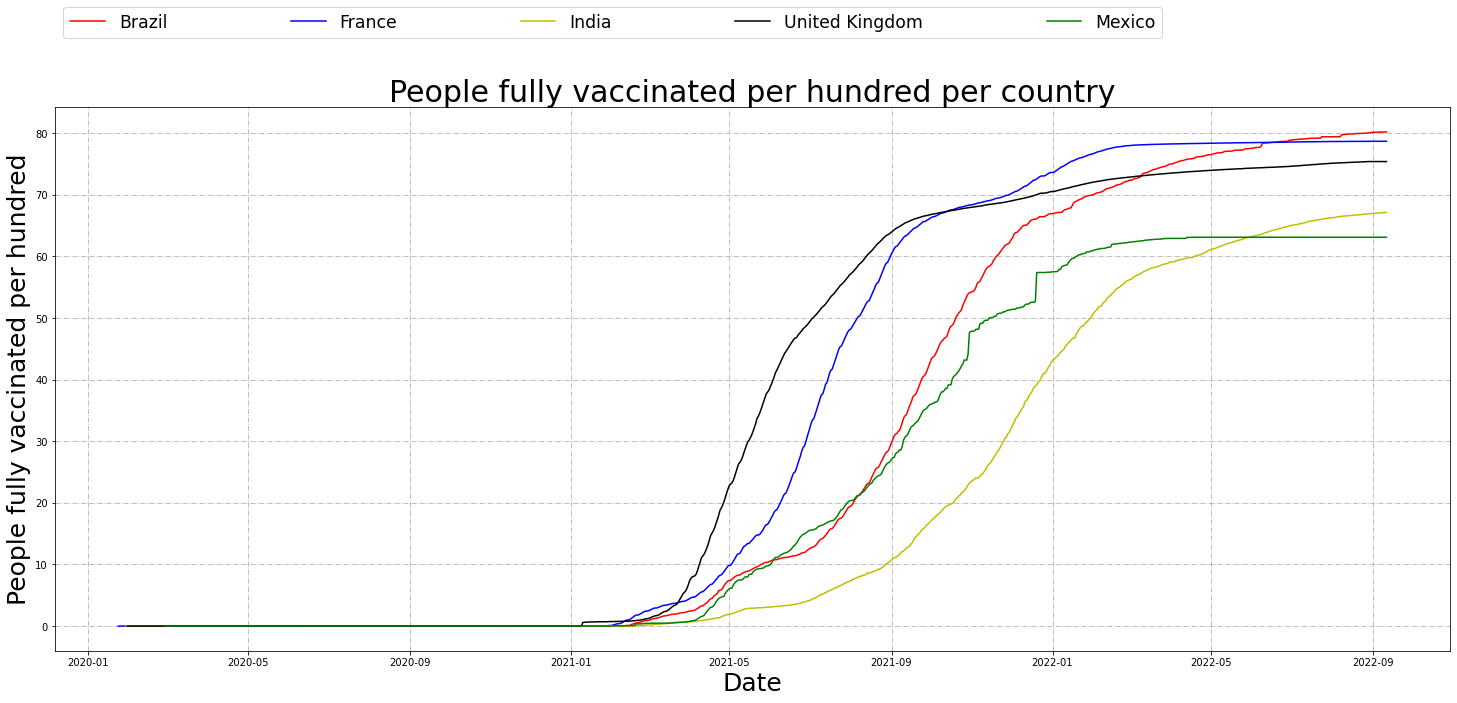

In [63]:
x1 = countries_index['Brazil']['date']
y1 = countries_index['Brazil']['people_fully_vaccinated_per_hundred']

x2 = countries_index['France']['date']
y2 = countries_index['France']['people_fully_vaccinated_per_hundred']

x3 = countries_index['India']['date']
y3 = countries_index['India']['people_fully_vaccinated_per_hundred']

x4 = countries_index['United Kingdom']['date']
y4 = countries_index['United Kingdom']['people_fully_vaccinated_per_hundred']

x5 = countries_index['Mexico']['date']
y5 = countries_index['Mexico']['people_fully_vaccinated_per_hundred']

img = plt.figure(figsize=(25,10))
plt.plot(x1, y1, color = 'r', label = 'Brazil')
plt.plot(x2, y2, color = 'b', label = 'France')
plt.plot(x3, y3, color = 'y', label = 'India')
plt.plot(x4, y4, color = 'black', label = 'United Kingdom')
plt.plot(x5, y5, color = 'g', label = 'Mexico')

plt.xlabel('Date', fontsize=25)
plt.ylabel('People fully vaccinated per hundred', color='black', fontsize=25);
plt.grid(visible=True, linestyle='-.')
plt.legend(['Brazil','France','India', 'United Kingdom', 'Mexico'],
          fontsize='xx-large', loc='best', bbox_to_anchor =(0, 1.2, 0.8, 0.001),ncol=5, mode="expand");

plt.title(f'People fully vaccinated per hundred per country', fontsize=30);

In [64]:
def plot_per_country(df, country_name, category = "Confirmed", ref_df = df0):
    """to help us plot other countries/regions, not only for the confirmed cases, 
    but also other cases (Recovered or Deaths).
    """
    if 'Country/Region' in df.columns:
        provinces_list = df[df['Country/Region'] == country_name].iloc[:,0:1].T.values.tolist()[0]
    else:
        provinces_list = df[df['Country_Region'] == country_name].iloc[:,6:7].T.values.tolist()[0]
        
    map_output = map(lambda x: x + '_' + category, provinces_list)
    list_map_output = list(map_output)

    if 'Country/Region' in df.columns:
        df0 = df[df['Country/Region'] == country_name].iloc[:,5:].fillna(0)
    else:
        df0 = df[df['Country_Region'] == country_name].iloc[:,11:].fillna(0)
    
    df0.index = pd.Index(list_map_output, name='date_time')
    df0 = df0.loc[:, ~df0.columns.str.contains('^Unnamed')]
    df0 = df0.T
    df0.index = pd.to_datetime(df0.index, format='%m/%d/%y', exact = False)
    
    width_multiplier = df0.shape[1]/5

    df0.plot(figsize=(15,2*width_multiplier), 
             title='Plotting all the time series on one axis (line-plot)').legend(loc='upper left')
    plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    
    ax_array = df0.plot(subplots=True, figsize=(15,3*width_multiplier))
    for ax in ax_array:
        ax.legend(loc='upper left')
    plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    text = plt.title('Plotting all time-series on separate subplots (sharing the x axis)', pad="-120",
                     y=2.0, loc="center")
    
    df0.plot(y=list_map_output, linestyle=':', linewidth=4, 
             grid=True, figsize=(15,2*width_multiplier),
              title="Plotting all time series on one axis (scatterplot)").legend(loc='upper left')
    plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    
    return df0

NameError: name 'df0' is not defined